In [1]:
%cd ..

/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/Complex Systems Simulation/css_group_6


In [2]:
import numpy as np
import math
import random
from modules import ca_model
import matplotlib.pyplot as plt

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]),
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1),
                         (ORIGIN[0], ORIGIN[1] + 1)]
K1, K2, K3, K4 = 0.74, 0.2, 0.4, 0.4  # These represent global mitosis and transformation rates, respectively
RHO = 3.85

def mean_field_interaction(M, cell_type):
    n_prime = ca_model.calculate_n_prime(M)
    if n_prime == 0:
        return 0.0
    return ca_model.sum_cell_type(M, cell_type) / n_prime

def mitosis(M, newM, r, c, dense):
    """ Model cell division with density development. """
    mitosis_prob = ca_model.mitosis_probability(K1, ca_model.sum_cell_type(M, 'C'), 1, 1, {})
    if random.random() < mitosis_prob:
        newM[r, c] = 'C'
    elif random.random() < K2:
        newM[r, c] = 'E'
    return newM

def simulate_tumor_growth_one_step(M, generation, time_delay, history):
    newM = np.copy(M)
    ca_model.store_history(generation, M, history)

    for r in range(1, ROWS - 1):
        for c in range(1, COLS - 1):
            if M[r, c] == 'C':
                newM = mitosis(M, newM, r, c, ca_model.density_development(M) > RHO)
            elif M[r, c] == 'E' and random.random() < K3:
                newM[r, c] = 'D'
            elif M[r, c] == 'D' and random.random() < K4:
                newM[r, c] = 'N'
    return newM

def simulate_tumor_growth(time_delay, generations):
    history = {}
    M = ca_model.initialize_grid()

    for g in range(generations):
        M = simulate_tumor_growth_one_step(M, g, time_delay, history)

    return history

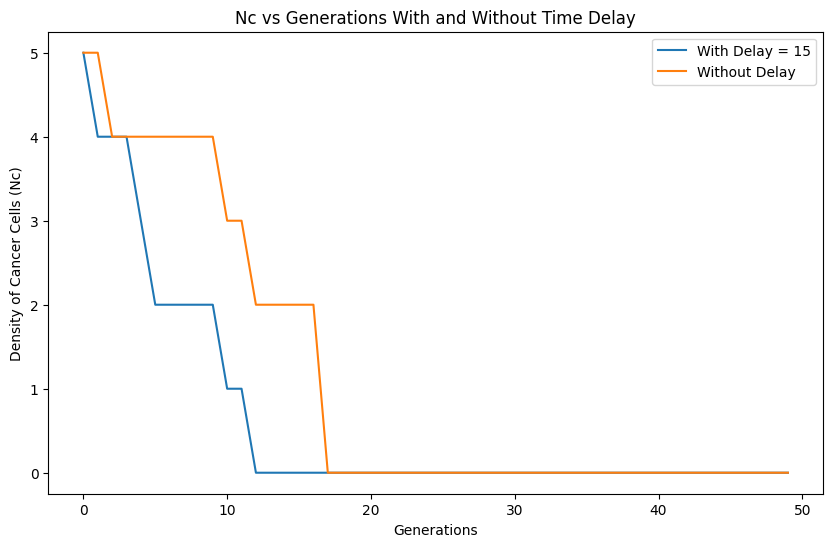

In [5]:
history_with_delay = simulate_tumor_growth(10, 50)
history_without_delay = simulate_tumor_growth(0, 50)

Nc_with_delay_15 = [int(history_with_delay[g]['Nc']) for g in range(50)]
Nc_without_delay = [int(history_without_delay[g]['Nc']) for g in range(50)]

plt.figure(figsize=(10, 6))
plt.plot(range(50), Nc_with_delay_15, label='With Delay = 15')
plt.plot(range(50), Nc_without_delay, label='Without Delay')
plt.xlabel('Generations')
plt.ylabel('Density of Cancer Cells (Nc)')
plt.title('Nc vs Generations With and Without Time Delay')
plt.legend()
plt.show()